# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
df = pd.read_excel('Bank_loan_data.xlsx')

In [3]:
df.sample(10)

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
3052,3053,54,NaN,30,75.0,94720,2,3.2,3,0,NaN,0,0,0,0.0,1
139,140,59,NaN,35,18.0,93305,1,1.2,3,0,NaN,0,0,0,1.0,0
681,682,34,M,9,164.0,94720,1,6.0,3,0,Rent,1,0,0,1.0,0
156,157,26,NaN,0,15.0,92131,4,0.4,1,0,NaN,0,0,0,0.0,1
2587,2588,60,NaN,33,55.0,94998,4,2.5,2,0,NaN,0,0,0,1.0,0
2291,2292,47,NaN,23,90.0,95449,1,2.7,1,323,NaN,0,0,0,0.0,0
4983,4984,51,NaN,26,72.0,95370,1,2.9,1,0,NaN,0,0,0,0.0,0
1518,1519,43,M,17,NaN,95053,4,3.0,3,221,Home Mortage,1,0,0,1.0,0
2266,2267,38,NaN,13,143.0,94550,1,4.1,1,0,NaN,0,0,0,0.0,0
1391,1392,44,NaN,18,84.0,91330,3,1.1,1,0,NaN,0,0,0,0.0,0


# Understanding the data

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,2500.500000,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.describe(include = "all")

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,480,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,480,5000.0,5000.000000,5000.00000,4960.000000,5000.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.0,NaN,NaN,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Mortage,0.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219,4520.0,NaN,NaN,NaN,NaN
mean,2500.500000,46.008200,NaN,20.104600,72.758159,93152.503000,2.396400,1.937913,1.881000,56.498800,NaN,NaN,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,NaN,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839869,101.713802,NaN,NaN,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,NaN,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,NaN,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,NaN,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,NaN,NaN,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,NaN,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,NaN,NaN,0.000000,0.00000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              480 non-null    object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      480 non-null    object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [7]:
df.shape

(5000, 16)

In [8]:
df.ndim

2

In [9]:
df.isnull().sum().sort_values(ascending=False)

Gender                4520
Home Ownership        4520
Income                  67
Online                  40
ID                       0
Age                      0
Experience               0
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Personal Loan            0
Securities Account       0
CD Account               0
CreditCard               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique().sort_values(ascending=False)

ID                    5000
ZIP Code               467
Mortgage               347
Income                 162
CCAvg                  108
Age                     58
Experience              47
Family                   4
Gender                   3
Education                3
Home Ownership           3
Personal Loan            3
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.022173,-0.008326,-0.022748,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.016972,-0.006909,-0.003776,0.017028
Age,-0.022173,1.000000,0.439132,0.026946,-0.022257,-0.017867,0.011769,0.023981,0.021672,-0.008234,0.022654,0.005506,-0.000087
Experience,-0.008326,0.439132,1.000000,-0.049319,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.001232,0.010353,0.013981,0.008967
Income,-0.022748,0.026946,-0.049319,1.000000,-0.018415,-0.167167,0.643791,-0.204329,0.201489,-0.004553,0.150053,0.011320,-0.008559
ZIP Code,0.013432,-0.022257,-0.028626,-0.018415,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.004704,0.019972,0.017773,0.007691
Family,-0.016797,-0.017867,-0.052563,-0.167167,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.019994,0.014110,0.010994,0.011588
CCAvg,-0.024672,0.011769,-0.050089,0.643791,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.015087,0.136537,-0.002092,-0.006686
Education,0.021463,0.023981,0.013152,-0.204329,-0.017377,0.064929,-0.136138,1.000000,-0.033327,-0.010812,0.013934,-0.014292,-0.011014
Mortgage,-0.013920,0.021672,-0.010582,0.201489,0.007383,-0.020445,0.109909,-0.033327,1.000000,-0.005411,0.089311,-0.005379,-0.007231
Securities Account,-0.016972,-0.008234,-0.001232,-0.004553,0.004704,0.019994,0.015087,-0.010812,-0.005411,1.000000,0.317034,0.011502,-0.015028


In [13]:
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,NaN,1,49.0,91107,4,1.6,1,0,NaN,0,1,0,0.0,0
1,2,45,NaN,19,34.0,90089,3,1.5,1,0,NaN,0,1,0,0.0,0
2,3,39,NaN,15,11.0,94720,1,1.0,1,0,NaN,0,0,0,0.0,0
3,4,35,NaN,9,100.0,94112,1,2.7,2,0,NaN,0,0,0,0.0,0
4,5,35,NaN,8,45.0,91330,4,1.0,2,0,NaN,0,0,0,0.0,1


# Checking wheather some columns has unexpected values or not

In [14]:
df["Age"].unique()

array([ 25,  45,  39,  35,  37,  53,  50,  34,  65,  29,  48,  59,  67,
        60,  38,  42,  46,  55,  56,  57,  44,  36,  43,  40,  30,  31,
        51,  32,  97,  61, 567,  41,  28,  49,  47,  62,  58,   0,  33,
        27,  13,  54,  66,  24,  52, 122,  26,  64,  63,  23, 978,   2,
         4, 786, 600,   7,   8, 797], dtype=int64)

In [15]:
df["Gender"].unique()

array([nan, 'M', 'F', 'O'], dtype=object)

In [16]:
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [17]:
df["Experience"].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 15    119
 8     119
 6     119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [18]:
df["Income"].unique()

array([ 49.,  34.,  11., 100.,  45.,  29.,  72.,  22.,  81., 180., 105.,
       114.,  40., 112., 130., 193.,  21.,  25.,  63.,  62.,  43., 152.,
        83., 158.,  48.,  nan,  35.,  41.,  18.,  50., 121.,  71.,  80.,
        84.,  60., 132., 104.,  52., 194.,   8., 131., 190.,  44., 139.,
        93., 188.,  39., 125.,  32.,  20., 115.,  69.,  85., 135.,  12.,
        19.,  82., 109.,  42.,  78.,  51., 113., 118.,  64., 161.,  94.,
        15.,  74.,  30.,  38.,   9.,  92.,  61.,  73.,  70., 149.,  98.,
       128.,  31.,  58.,  54., 124., 163.,  24.,  79., 134.,  23.,  13.,
       138., 171., 168.,  65.,  10., 148., 159., 169., 144., 165.,  59.,
        68.,  91., 172.,  55., 155.,  53.,  89.,  28.,  75., 170., 120.,
        99., 111.,  33., 129., 122., 150., 195., 119., 110., 101., 191.,
       140., 153., 173., 141., 174.,  90., 133., 179., 145., 200., 183.,
       182.,  88., 160., 205., 164.,  14., 175., 103., 108., 185., 204.,
       154., 102., 192., 202., 162., 142.,  95., 18

In [19]:
df["Family"].unique()

array([4, 3, 1, 2], dtype=int64)

In [20]:
df["CCAvg"].unique()

array([ 1.6       ,  1.5       ,  1.        ,  2.7       ,  0.4       ,
        0.3       ,  0.6       ,  8.9       ,  2.4       ,  0.1       ,
        3.8       ,  2.5       ,  2.        ,  4.7       ,  8.1       ,
        0.5       ,  0.9       ,  1.2       ,  0.7       ,  3.9       ,
        0.2       ,  2.2       ,  3.3       ,  1.8       ,  2.9       ,
        1.4       ,  5.        ,  2.3       ,  1.1       ,  5.7       ,
        4.5       ,  2.1       ,  8.        ,  1.7       ,  0.        ,
        2.8       ,  3.5       ,  4.        ,  2.6       ,  1.3       ,
        5.6       ,  5.2       ,  3.        ,  4.6       ,  3.6       ,
        7.2       ,  1.75      ,  7.4       ,  2.66666667,  7.5       ,
        6.5       ,  7.8       ,  7.9       ,  4.1       ,  1.9       ,
        4.3       ,  6.8       ,  5.1       ,  3.1       ,  0.8       ,
        3.7       ,  6.2       ,  0.75      ,  2.33333333,  4.9       ,
        0.66666667,  3.2       ,  5.5       ,  6.9       ,  4.33

In [21]:
df["Education"].unique()

array([1, 2, 3], dtype=int64)

In [22]:
df["Home Ownership"].unique()

array([nan, 'Home Owner', 'Rent', 'Home Mortage'], dtype=object)

In [23]:
df["Personal Loan"].unique()

array([0, 1, ' '], dtype=object)

In [24]:
df["Personal Loan"].value_counts()

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

In [25]:
df["Securities Account"].unique()

array([1, 0], dtype=int64)

In [26]:
df["CD Account"].unique()

array([0, 1], dtype=int64)

In [27]:
df["Online"].unique()

array([ 0.,  1., nan])

In [28]:
df["CreditCard"].unique()

array([0, 1], dtype=int64)

# Data Preprocessing

In [29]:
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,NaN,1,49.0,91107,4,1.6,1,0,NaN,0,1,0,0.0,0
1,2,45,NaN,19,34.0,90089,3,1.5,1,0,NaN,0,1,0,0.0,0
2,3,39,NaN,15,11.0,94720,1,1.0,1,0,NaN,0,0,0,0.0,0
3,4,35,NaN,9,100.0,94112,1,2.7,2,0,NaN,0,0,0,0.0,0
4,5,35,NaN,8,45.0,91330,4,1.0,2,0,NaN,0,0,0,0.0,1


In [30]:
df.drop(["ID", "ZIP Code"], axis=1, inplace=True) # Removing unnecessary columns

In [31]:
df.head()

,Age,Gender,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,NaN,1,49.0,4,1.6,1,0,NaN,0,1,0,0.0,0
1,45,NaN,19,34.0,3,1.5,1,0,NaN,0,1,0,0.0,0
2,39,NaN,15,11.0,1,1.0,1,0,NaN,0,0,0,0.0,0
3,35,NaN,9,100.0,1,2.7,2,0,NaN,0,0,0,0.0,0
4,35,NaN,8,45.0,4,1.0,2,0,NaN,0,0,0,0.0,1


# Removing null values

In [32]:
df.isnull().sum().sort_values(ascending=False)

Gender                4520
Home Ownership        4520
Income                  67
Online                  40
Age                      0
Experience               0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Personal Loan            0
Securities Account       0
CD Account               0
CreditCard               0
dtype: int64

In [33]:
df.isnull().mean().sort_values(ascending=False)*100 #Checking the null values percentage-wise

Gender                90.40
Home Ownership        90.40
Income                 1.34
Online                 0.80
Age                    0.00
Experience             0.00
Family                 0.00
CCAvg                  0.00
Education              0.00
Mortgage               0.00
Personal Loan          0.00
Securities Account     0.00
CD Account             0.00
CreditCard             0.00
dtype: float64

#### The columns <u>Gender</u> and <u>Home Ownership</u> has 90% missing values and there is no point keeping these columns or trying to impute them so I will be dropping these

In [34]:
df.drop(["Gender", "Home Ownership"], axis=1, inplace=True)

In [35]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,0,1,0,0.0,0
1,45,19,34.0,3,1.5,1,0,0,1,0,0.0,0
2,39,15,11.0,1,1.0,1,0,0,0,0,0.0,0
3,35,9,100.0,1,2.7,2,0,0,0,0,0.0,0
4,35,8,45.0,4,1.0,2,0,0,0,0,0.0,1


<style>
hr {
  border: none;
  border-top: 3px solid #333333; /* Adjust the color code to make it darker */
  margin: 1em 0;
}
</style>

<hr>
<hr>


### The columns <u>Income</u> and <u>Online</u> have missing data less than 2% which is why I will be using CCA(Complete Case Analysis) and dropping them as the missing values are less and it wont hamper the overall data distribution. Also the missing values are at completely random places which makes sense of dropping them rather than imputing

In [36]:
df[df["Income"].isna()] # Checking wheather if the values were missing at random or not. In this case it was

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
29,38,13,NaN,1,3.3,2,0,1,0,1,1.0,1
38,42,18,NaN,3,5.0,3,0,1,1,1,1.0,0
78,0,30,NaN,2,2.6,3,0,1,0,0,0.0,0
199,36,11,NaN,1,5.1,3,0,1,0,1,1.0,1
324,56,30,NaN,4,6.1,1,0,1,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4790,35,11,NaN,3,3.8,3,150,1,0,0,1.0,0
4859,34,8,NaN,1,7.0,3,541,1,0,0,0.0,0
4927,43,19,NaN,1,0.7,2,0,1,0,1,1.0,1
4941,28,4,NaN,2,1.6,2,0,1,0,0,1.0,0


In [37]:
df[df["Online"].isna()] # Checking wheather if the values were missing at random or not. In this case it was

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
57,56,31,131.0,2,1.200000,3,0,1,0,0,NaN,0
75,31,7,135.0,4,3.800000,2,0,1,0,1,NaN,1
160,29,0,134.0,4,6.500000,3,0,1,0,0,NaN,0
299,41,15,159.0,1,5.500000,3,0,1,0,1,NaN,0
382,65,41,133.0,4,2.000000,1,0,1,0,0,NaN,1
388,54,30,100.0,4,3.400000,3,0,1,0,0,NaN,0
400,36,10,179.0,3,6.600000,1,0,1,0,0,NaN,0
421,28,3,115.0,4,3.100000,2,0,1,0,0,NaN,0
607,28,3,170.0,1,0.100000,3,0,1,0,0,NaN,0
728,45,20,114.0,2,4.400000,2,0,1,0,0,NaN,0


In [38]:
df_income = df["Income"].dropna()
df_online = df["Online"].dropna()

In [39]:
# Recording on new variables in order to compare the pdf 
df_income.isnull().sum(), df_online.isnull().sum()

(0, 0)

Text(0.5, 1.0, 'PDF of original Income data stacked in top of data after dropping NA')

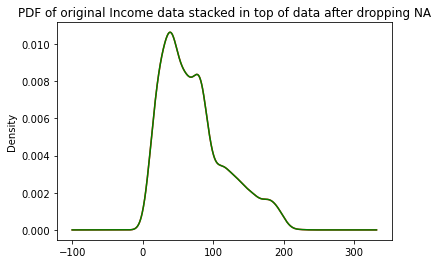

In [40]:
# Comparing the pdf before and after performing CCA

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df["Income"].plot.density(color="red")

# data after cca
df_income.plot.density(color="green")

plt.title("PDF of original Income data stacked in top of data after dropping NA")

Text(0.5, 1.0, 'PDF of original Online data stacked in top of data after dropping NA')

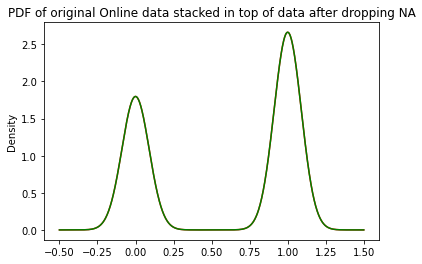

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df["Online"].plot.density(color="red")

# data after cca
df_online.plot.density(color="green")

plt.title("PDF of original Online data stacked in top of data after dropping NA")

### Missing values on both these columns are completely at random and also less than 2%. After dropping them you can see in the above pdf's the distributions are not affected at all which is why CCA can be used here.

In [42]:
df.dropna(subset=["Income", "Online"], inplace=True)

In [43]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<hr>
<hr>

## Experience Column

#### Experience can't be negative but the column contians some negative values. Negative values eventually means 0 experience so I am converting all those values to 0 experience instead of dropping the row as it contains some valuable data for other columns

In [44]:
df["Experience"] = df["Experience"].replace([-1, -2, -3], 0)

In [45]:
df["Experience"].value_counts() # There are no -ve values in the experience column now

32    152
9     145
5     144
23    142
20    142
25    139
35    137
28    136
18    134
26    132
19    131
24    130
14    127
34    125
27    124
3     124
16    124
22    123
17    122
29    120
30    119
7     119
6     119
15    116
0     116
10    116
8     116
33    116
13    114
37    112
21    112
11    112
36    111
4     110
31    103
12     98
38     87
39     82
2      82
1      73
40     56
41     42
42      8
43      3
Name: Experience, dtype: int64

## Income Column
As per the data dictionary the price should be in thousands but they are not, so convering them.

In [46]:
df["Income"] = df["Income"]*1000 #Converting to thousands

In [47]:
df["Income"] = df["Income"].astype(int) # Converting the value to int

In [48]:
df["Income"] 

0        49000
1        34000
2        11000
3       100000
4        45000
         ...  
4995     40000
4996     15000
4997     24000
4998     49000
4999     83000
Name: Income, Length: 4895, dtype: int32

<hr>
<hr>

## CCAvg Column
As per the data dictionary the price should be in thousands but they are not, so convering them.

In [49]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,4,1.6,1,0,0,1,0,0.0,0
1,45,19,34000,3,1.5,1,0,0,1,0,0.0,0
2,39,15,11000,1,1.0,1,0,0,0,0,0.0,0
3,35,9,100000,1,2.7,2,0,0,0,0,0.0,0
4,35,8,45000,4,1.0,2,0,0,0,0,0.0,1


In [50]:
df["CCAvg"] = df["CCAvg"]*1000 #Converting to thousands
df["CCAvg"] = df["CCAvg"].astype(int)
df["CCAvg"].head()

0    1600
1    1500
2    1000
3    2700
4    1000
Name: CCAvg, dtype: int32

In [51]:
df["CCAvg"].unique()

array([ 1600,  1500,  1000,  2700,   400,   300,   600,  8900,  2400,
         100,  3800,  2500,  2000,  4700,  8100,   500,   900,  1200,
         700,  3900,   200,  2200,  1800,  2900,  1400,  2300,  1100,
        5700,  4500,  2100,  8000,  1700,     0,  3300,  2800,  3500,
        5000,  4000,  1300,  5600,  5200,  3000,  4600,  3600,  7200,
        1750,  7400,  2666,  7500,  6500,  2600,  7800,  7900,  4100,
        1900,  4300,  6800,  3100,   800,  3700,  6200,   750,  2333,
        4900,   666,  3200,  6900,  4333,  7300,  4200,  4400,  6333,
        6600,  5300,  7000,  3400,  6300,  8300,  5500,  6100,  6000,
        1666,  8600,  5100,  7600,  6400,  8800,  5400,  1333,  9000,
        5900,  6700,  4250,  6666,  4800,  3250,  5666,  8500, 10000,
        4750,  4666,  3333,  5333,  5800,  9300,  2750])

<hr>
<hr>

## Personal Loan Column
This target variable contains one data null data.Actually its not null but is represented as " ". While modelling this will create error so I am dropping this as well

In [52]:
df["Personal Loan"].value_counts()

0    4520
1     374
        1
Name: Personal Loan, dtype: int64

In [53]:
df[df["Personal Loan"] == " "]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
42,32,7,132000,4,1100,2,412,,0,0,1.0,0


In [54]:
df.drop(42, inplace=True) # Since this is the only row with null value
df["Personal Loan"] = df["Personal Loan"].astype(int)

In [55]:
df[df["Personal Loan"] == " "]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [56]:
df.reset_index(drop=True, inplace=True)# Resetting the index after dropping index number 42

<hr>
<hr>

## Online Column

In [57]:
df["Online"].head() #Changing to int

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Online, dtype: float64

In [58]:
df["Online"] = df["Online"].astype(int)

In [59]:
df["Online"].head()

0    0
1    0
2    0
3    0
4    0
Name: Online, dtype: int32

## Mortgage Column
Converting the column in thousands as mentioned in data dictionary

In [60]:
df["Mortgage"].head(10)

0      0
1      0
2      0
3      0
4      0
5    155
6      0
7      0
8    104
9      0
Name: Mortgage, dtype: int64

In [61]:
df["Mortgage"] = df["Mortgage"]*1000 # Converted into thousands

In [62]:
df["Mortgage"].head(10)

0         0
1         0
2         0
3         0
4         0
5    155000
6         0
7         0
8    104000
9         0
Name: Mortgage, dtype: int64

<hr>
<hr>

In [63]:
#Re-positioning the target varaible as the last column for ease of use.
column_name = "Personal Loan"
df[column_name] = df.pop(column_name)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4,1600,1,0,1,0,0,0,0
1,45,19,34000,3,1500,1,0,1,0,0,0,0
2,39,15,11000,1,1000,1,0,0,0,0,0,0
3,35,9,100000,1,2700,2,0,0,0,0,0,0
4,35,8,45000,4,1000,2,0,0,0,0,1,0


<hr>
<hr>

# Age Column
This column has some unexpected values like, some age values are above 100. Since the average age is around 80 but for this notebook I will consider as 100 and drop all the other values as those outliers are dominating other values

In [64]:
df[df["Age"] > 100]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
50,567,26,190000,3,2100,3,240000,0,0,1,0,1
125,122,34,149000,4,7200,2,0,0,1,1,1,1
745,978,21,109000,4,1800,1,0,0,0,0,0,1
1956,786,23,170000,2,6500,2,0,0,1,1,1,1
2048,600,5,203000,1,10000,3,0,0,0,0,0,1
2480,797,8,171000,2,2200,2,569000,0,0,1,0,1


In [65]:
df = df[df["Age"] <= 100]
df[df["Age"] > 100] # Age above 100 are dropped

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan


# Analyzing total income of each family size 
It is found that family with only 1 member has the most amount of income

In [66]:
df.shape

(4888, 12)

In [67]:
df.groupby("Family").sum()[["Income", "CCAvg"]].sort_values(by="Income", ascending=False)

,Income,CCAvg
Family,,
1,112265000,2957831
2,106172000,2831885
4,70615000,1859288
3,63420000,1610374


In [68]:
# Montly spending was also more by 1 member on a family
df.groupby("Family").sum()[["Income", "CCAvg"]].sort_values(by="CCAvg", ascending=False)

,Income,CCAvg
Family,,
1,112265000,2957831
2,106172000,2831885
4,70615000,1859288
3,63420000,1610374


In [69]:
#only 374 family members were granted loan within the whole dataset
df["Personal Loan"].value_counts()

0    4520
1     368
Name: Personal Loan, dtype: int64

# Total income with respect to education
As per data dictionary 1:bachloers 2:master 3:advanced
For this dataset the total income of bachloers is greater than other two as well as the montly spendings

In [70]:
df.groupby("Education").sum()[["Income", "CCAvg"]].sort_values(by="Income", ascending=False)

,Income,CCAvg
Education,,
1,176414000,4658153
3,92044000,2382337
2,84014000,2218888


In [71]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4,1600,1,0,1,0,0,0,0
1,45,19,34000,3,1500,1,0,1,0,0,0,0
2,39,15,11000,1,1000,1,0,0,0,0,0,0
3,35,9,100000,1,2700,2,0,0,0,0,0,0
4,35,8,45000,4,1000,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4889,29,3,40000,1,1900,3,0,0,0,1,0,0
4890,30,4,15000,4,400,1,85000,0,0,1,0,0
4891,63,39,24000,2,300,3,0,0,0,0,0,0
4892,65,40,49000,3,500,2,0,0,0,1,0,0


# Feature Engineering

# Forging up monthly income column

In [72]:
# As per dictionary the data provided was of annual so dividing to get montly income
df["Income_monthly"] = df["Income"]/12
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Income_monthly
0,25,1,49000,4,1600,1,0,1,0,0,0,0,4083.333333
1,45,19,34000,3,1500,1,0,1,0,0,0,0,2833.333333
2,39,15,11000,1,1000,1,0,0,0,0,0,0,916.666667
3,35,9,100000,1,2700,2,0,0,0,0,0,0,8333.333333
4,35,8,45000,4,1000,2,0,0,0,0,1,0,3750.000000


In [73]:
# Keeping the income_monthly besides income colum so that it will be easy to analyze
df.insert(3, "Income_monthly", df.pop("Income_monthly"))
df.head()

,Age,Experience,Income,Income_monthly,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,4,1600,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,3,1500,1,0,1,0,0,0,0
2,39,15,11000,916.666667,1,1000,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,1,2700,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,4,1000,2,0,0,0,0,1,0


# Forging up savings column

In [74]:
# Subtracting monthly income with monthy spending to get total saving by the family
df["Savings_monthly"] = df["Income_monthly"] - df["CCAvg"]
df

,Age,Experience,Income,Income_monthly,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Savings_monthly
0,25,1,49000,4083.333333,4,1600,1,0,1,0,0,0,0,2483.333333
1,45,19,34000,2833.333333,3,1500,1,0,1,0,0,0,0,1333.333333
2,39,15,11000,916.666667,1,1000,1,0,0,0,0,0,0,-83.333333
3,35,9,100000,8333.333333,1,2700,2,0,0,0,0,0,0,5633.333333
4,35,8,45000,3750.000000,4,1000,2,0,0,0,0,1,0,2750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,29,3,40000,3333.333333,1,1900,3,0,0,0,1,0,0,1433.333333
4890,30,4,15000,1250.000000,4,400,1,85000,0,0,1,0,0,850.000000
4891,63,39,24000,2000.000000,2,300,3,0,0,0,0,0,0,1700.000000
4892,65,40,49000,4083.333333,3,500,2,0,0,0,1,0,0,3583.333333


In [75]:
df.insert(6, "Savings_monthly", df.pop("Savings_monthly"))
df.head()

,Age,Experience,Income,Income_monthly,Family,CCAvg,Savings_monthly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,4,1600,2483.333333,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,3,1500,1333.333333,1,0,1,0,0,0,0
2,39,15,11000,916.666667,1,1000,-83.333333,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,1,2700,5633.333333,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,4,1000,2750.000000,2,0,0,0,0,1,0


In [76]:
# Since savings cant be in negative so I will consider them as 0 savings. These are the failies who didnt saved at all
df[df["Savings_monthly"]<0]

,Age,Experience,Income,Income_monthly,Family,CCAvg,Savings_monthly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
2,39,15,11000,916.666667,1,1000,-83.333333,1,0,0,0,0,0,0
47,32,8,8000,666.666667,4,700,-33.333333,2,0,1,0,1,0,0
104,41,14,9000,750.000000,3,1000,-250.000000,2,0,0,0,0,0,0
907,50,23,9000,750.000000,2,1000,-250.000000,2,0,0,0,1,0,0
973,59,35,8000,666.666667,4,700,-33.333333,1,91000,1,0,0,0,0
1930,41,17,11000,916.666667,1,1000,-83.333333,1,0,0,0,0,0,0
2079,59,35,11000,916.666667,2,1000,-83.333333,1,0,0,0,0,1,0
2194,63,37,8000,666.666667,1,800,-133.333333,2,97000,0,0,1,0,0
2458,60,36,10000,833.333333,2,1000,-166.666667,1,0,0,0,1,1,0
2529,31,7,8000,666.666667,4,700,-33.333333,2,0,0,0,0,0,0


In [77]:
df.loc[df["Savings_monthly"] < 0, "Savings_monthly"] = 0

In [78]:
df[df["Savings_monthly"]<0] # All the negative sagvings replaced with 0 

,Age,Experience,Income,Income_monthly,Family,CCAvg,Savings_monthly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan


In [79]:
df

,Age,Experience,Income,Income_monthly,Family,CCAvg,Savings_monthly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,4,1600,2483.333333,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,3,1500,1333.333333,1,0,1,0,0,0,0
2,39,15,11000,916.666667,1,1000,0.000000,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,1,2700,5633.333333,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,4,1000,2750.000000,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,29,3,40000,3333.333333,1,1900,1433.333333,3,0,0,0,1,0,0
4890,30,4,15000,1250.000000,4,400,850.000000,1,85000,0,0,1,0,0
4891,63,39,24000,2000.000000,2,300,1700.000000,3,0,0,0,0,0,0
4892,65,40,49000,4083.333333,3,500,3583.333333,2,0,0,0,1,0,0


# Forging up yearly CCAvg column
As per data dictionary this is the average montyly spending. NOw if I multiply it with 12 I will get annual spending by the family

In [80]:
df["CCAvg_yearly"] = df["CCAvg"]*12

In [81]:
df.insert(6, "CCAvg_yearly", df.pop("CCAvg_yearly") )

In [82]:
df.head()

,Age,Experience,Income,Income_monthly,Family,CCAvg,CCAvg_yearly,Savings_monthly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,4,1600,19200,2483.333333,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,3,1500,18000,1333.333333,1,0,1,0,0,0,0
2,39,15,11000,916.666667,1,1000,12000,0.000000,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,1,2700,32400,5633.333333,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,4,1000,12000,2750.000000,2,0,0,0,0,1,0


# Forging up yearly Safings column

In [83]:
# Subtracting yearly income with yearly spending to get total saving by the family
df["Savings_yearly"] = df["Income"] - df["CCAvg_yearly"]

In [84]:
df.insert(8, "Savings_yearly", df.pop("Savings_yearly"))

In [85]:
df.head()

,Age,Experience,Income,Income_monthly,Family,CCAvg,CCAvg_yearly,Savings_monthly,Savings_yearly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,4,1600,19200,2483.333333,29800,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,3,1500,18000,1333.333333,16000,1,0,1,0,0,0,0
2,39,15,11000,916.666667,1,1000,12000,0.000000,-1000,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,1,2700,32400,5633.333333,67600,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,4,1000,12000,2750.000000,33000,2,0,0,0,0,1,0


In [86]:
# Since savings cant be in negative so I will consider them as 0 savings. These are the failies who didnt saved at all
df[df["Savings_yearly"]<0]

,Age,Experience,Income,Income_monthly,Family,CCAvg,CCAvg_yearly,Savings_monthly,Savings_yearly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
2,39,15,11000,916.666667,1,1000,12000,0.0,-1000,1,0,0,0,0,0,0
47,32,8,8000,666.666667,4,700,8400,0.0,-400,2,0,1,0,1,0,0
104,41,14,9000,750.000000,3,1000,12000,0.0,-3000,2,0,0,0,0,0,0
907,50,23,9000,750.000000,2,1000,12000,0.0,-3000,2,0,0,0,1,0,0
973,59,35,8000,666.666667,4,700,8400,0.0,-400,1,91000,1,0,0,0,0
1930,41,17,11000,916.666667,1,1000,12000,0.0,-1000,1,0,0,0,0,0,0
2079,59,35,11000,916.666667,2,1000,12000,0.0,-1000,1,0,0,0,0,1,0
2194,63,37,8000,666.666667,1,800,9600,0.0,-1600,2,97000,0,0,1,0,0
2458,60,36,10000,833.333333,2,1000,12000,0.0,-2000,1,0,0,0,1,1,0
2529,31,7,8000,666.666667,4,700,8400,0.0,-400,2,0,0,0,0,0,0


In [87]:
df.loc[df["Savings_yearly"] < 0, "Savings_yearly"] = 0

In [88]:
df[df["Savings_monthly"]<0] # All the negative sagvings replaced with 0 

,Age,Experience,Income,Income_monthly,Family,CCAvg,CCAvg_yearly,Savings_monthly,Savings_yearly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan


# Forging up income per person per year in a family

In [89]:
# Divding the yearly income with family members to get the income per person per year
df["Income_person_year"] = df["Income"]/df["Family"]

In [90]:
df.insert(4, "Income_person_year", df.pop("Income_person_year"))

In [91]:
df.head()

,Age,Experience,Income,Income_monthly,Income_person_year,Family,CCAvg,CCAvg_yearly,Savings_monthly,Savings_yearly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,12250.000000,4,1600,19200,2483.333333,29800,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,11333.333333,3,1500,18000,1333.333333,16000,1,0,1,0,0,0,0
2,39,15,11000,916.666667,11000.000000,1,1000,12000,0.000000,0,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,100000.000000,1,2700,32400,5633.333333,67600,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,11250.000000,4,1000,12000,2750.000000,33000,2,0,0,0,0,1,0


# Forging up expenditure per person per year within a family

In [92]:
# Divding the yearly spending with family members to get the income per person per year
df["Spending_person_year"] = df["CCAvg_yearly"]/df["Family"]

In [93]:
df.insert(8, "Spending_person_year", df.pop("Spending_person_year"))

In [94]:
df.head()

,Age,Experience,Income,Income_monthly,Income_person_year,Family,CCAvg,CCAvg_yearly,Spending_person_year,Savings_monthly,Savings_yearly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,12250.000000,4,1600,19200,4800.0,2483.333333,29800,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,11333.333333,3,1500,18000,6000.0,1333.333333,16000,1,0,1,0,0,0,0
2,39,15,11000,916.666667,11000.000000,1,1000,12000,12000.0,0.000000,0,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,100000.000000,1,2700,32400,32400.0,5633.333333,67600,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,11250.000000,4,1000,12000,3000.0,2750.000000,33000,2,0,0,0,0,1,0


# EDA

# Univariate Analysis

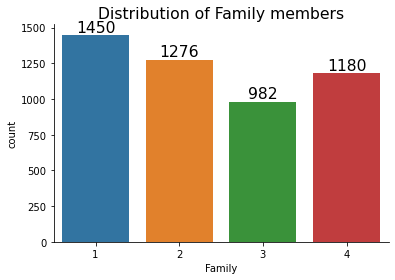

In [95]:
sns.countplot(df["Family"])
sns.despine()
sns.set_context("poster", font_scale=0.65)
plt.title("Distribution of Family members")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

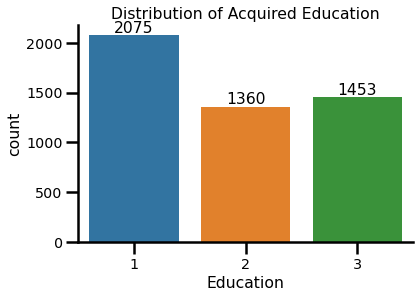

In [96]:
sns.countplot(df["Education"])
sns.despine()
sns.set_context("poster", font_scale=0.65)
plt.title("Distribution of Acquired Education")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

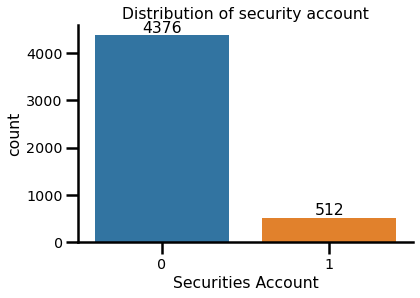

In [97]:
sns.countplot(df["Securities Account"])
sns.despine()
sns.set_context("poster", font_scale=0.65)
plt.title("Distribution of security account")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

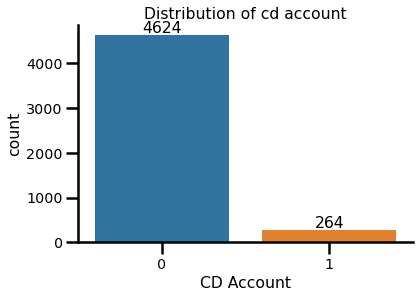

In [98]:
sns.countplot(df["CD Account"])
sns.despine()
sns.set_context("poster", font_scale=0.65)
plt.title("Distribution of cd account")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

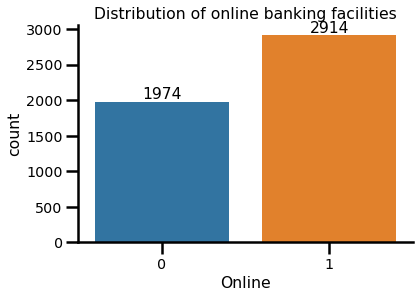

In [99]:
sns.countplot(df["Online"])
sns.despine()
sns.set_context("poster", font_scale=0.65)
plt.title("Distribution of online banking facilities")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

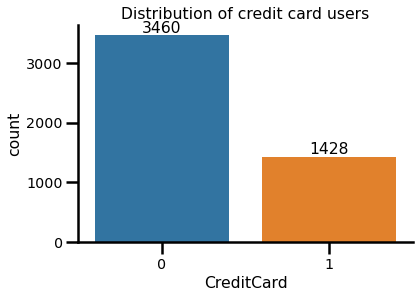

In [100]:
sns.countplot(df["CreditCard"])
sns.despine()
sns.set_context("poster", font_scale=0.65)
plt.title("Distribution of credit card users")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

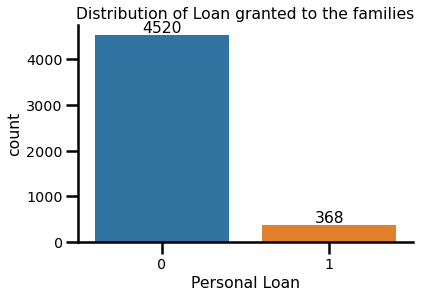

In [101]:
sns.countplot(df["Personal Loan"])
sns.despine()
sns.set_context("poster", font_scale=0.65)
plt.title("Distribution of Loan granted to the families")
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

<AxesSubplot:ylabel='Family'>

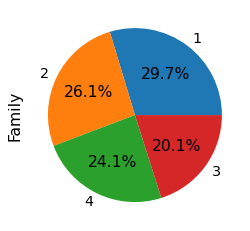

In [102]:
df["Family"].value_counts().plot(kind="pie", autopct='%1.1f%%')

<AxesSubplot:ylabel='Education'>

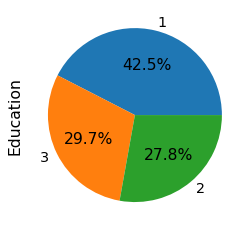

In [103]:
df["Education"].value_counts().plot(kind="pie", autopct='%1.1f%%')

# Multivariate Analysis

In [104]:
df

,Age,Experience,Income,Income_monthly,Income_person_year,Family,CCAvg,CCAvg_yearly,Spending_person_year,Savings_monthly,Savings_yearly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,12250.000000,4,1600,19200,4800.0,2483.333333,29800,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,11333.333333,3,1500,18000,6000.0,1333.333333,16000,1,0,1,0,0,0,0
2,39,15,11000,916.666667,11000.000000,1,1000,12000,12000.0,0.000000,0,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,100000.000000,1,2700,32400,32400.0,5633.333333,67600,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,11250.000000,4,1000,12000,3000.0,2750.000000,33000,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,29,3,40000,3333.333333,40000.000000,1,1900,22800,22800.0,1433.333333,17200,3,0,0,0,1,0,0
4890,30,4,15000,1250.000000,3750.000000,4,400,4800,1200.0,850.000000,10200,1,85000,0,0,1,0,0
4891,63,39,24000,2000.000000,12000.000000,2,300,3600,1800.0,1700.000000,20400,3,0,0,0,0,0,0
4892,65,40,49000,4083.333333,16333.333333,3,500,6000,2000.0,3583.333333,43000,2,0,0,0,1,0,0


<AxesSubplot:xlabel='Age', ylabel='Income'>

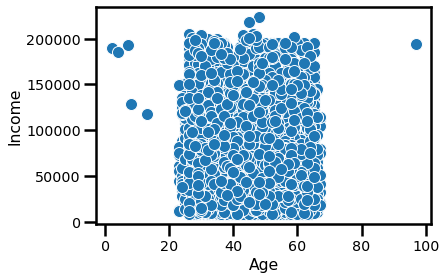

In [105]:
sns.scatterplot(df["Age"], df["Income"])

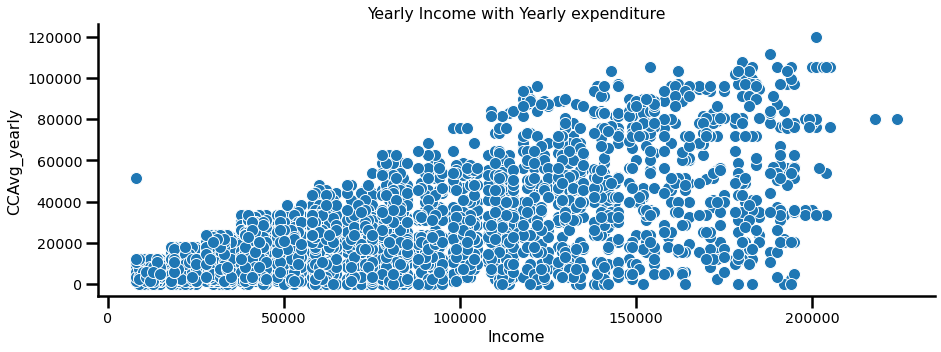

In [106]:
plt.figure(figsize=(15,5))
sns.scatterplot(df["Income"], df["CCAvg_yearly"])
sns.despine()
plt.title("Yearly Income with Yearly expenditure") # spendings is directly proportional with income
plt.show()

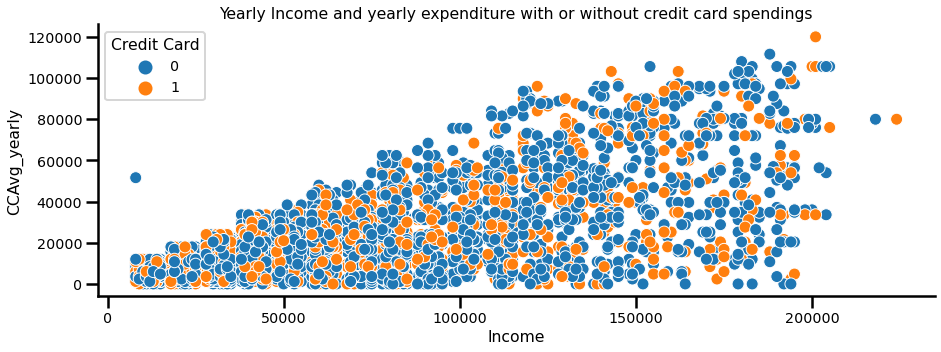

In [107]:
plt.figure(figsize=(15,5))
sns.scatterplot(df["Income"], df["CCAvg_yearly"], hue=df["CreditCard"])
sns.despine()
plt.title("Yearly Income and yearly expenditure with or without credit card spendings") # spendings is directly proportional with income
plt.legend(title = "Credit Card", loc = "upper left")
plt.show()

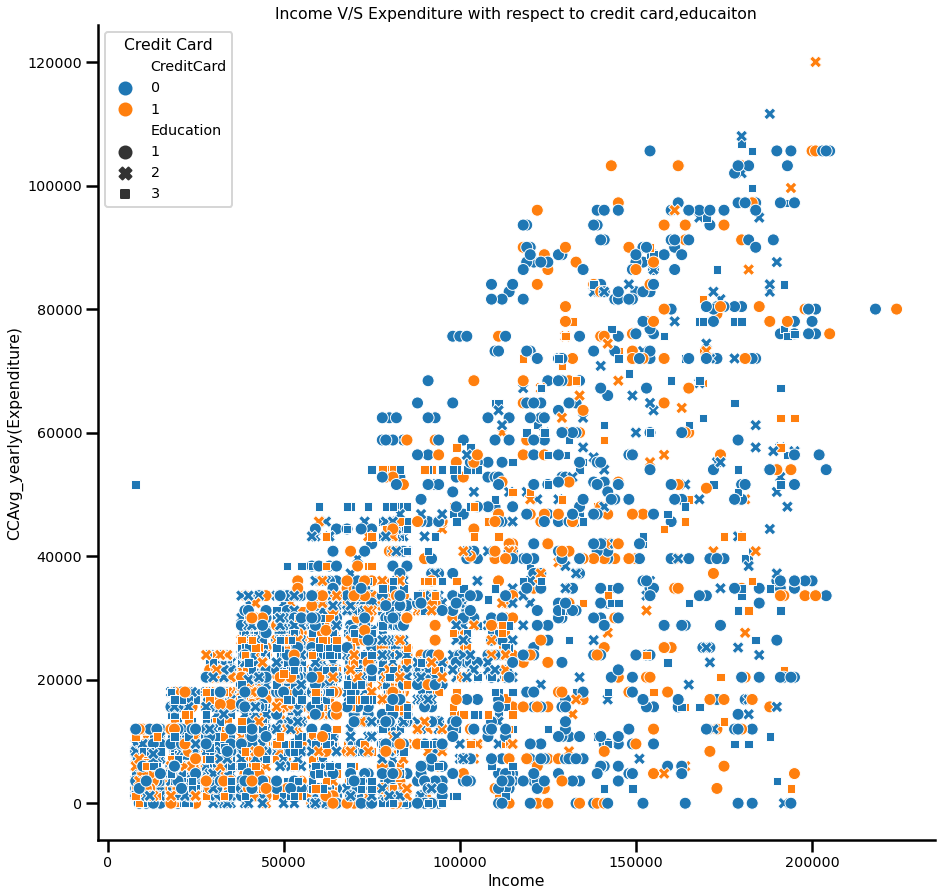

In [108]:
plt.figure(figsize=(15,15))
sns.scatterplot(df["Income"], df["CCAvg_yearly"], hue=df["CreditCard"], style=df["Education"])
sns.despine()
plt.title("Income V/S Expenditure with respect to credit card,educaiton") # spendings is directly proportional with income
plt.legend(title = "Credit Card", loc = "upper left")
plt.ylabel("CCAvg_yearly(Expenditure)")
plt.show()

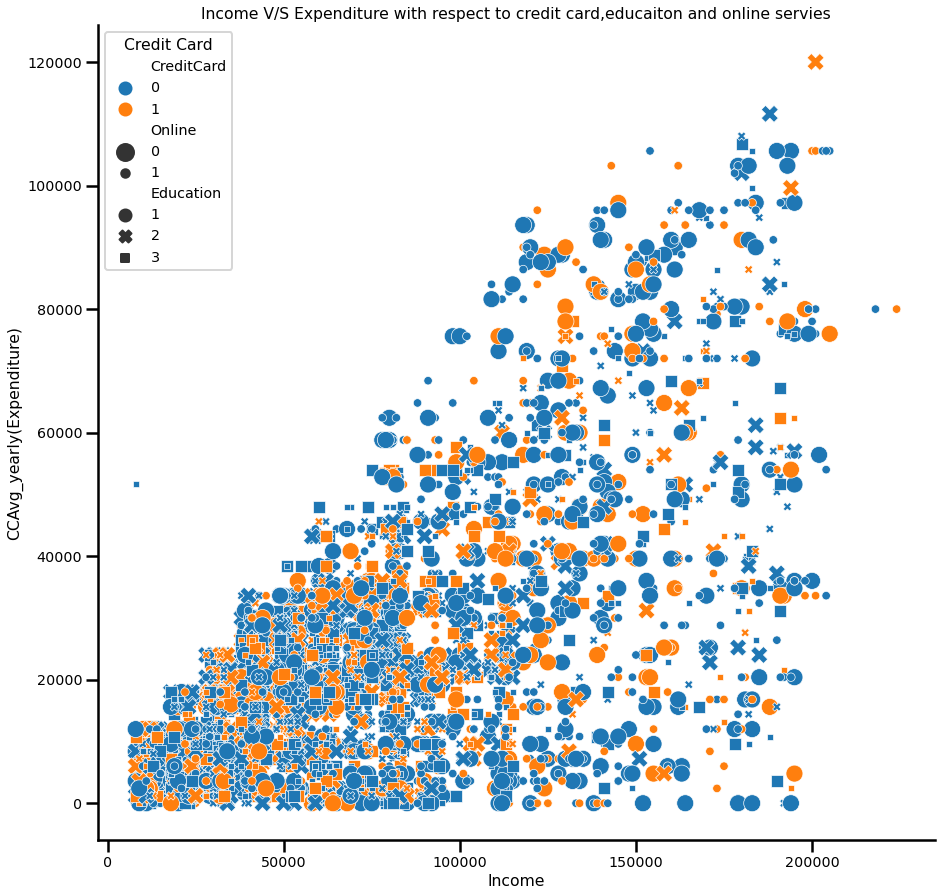

In [109]:
plt.figure(figsize=(15,15))
sns.scatterplot(df["Income"], df["CCAvg_yearly"], hue=df["CreditCard"], style=df["Education"], size=df["Online"])
# FOr credit card and ONline 0 means NO and 1 means Yes
sns.despine()
plt.title("Income V/S Expenditure with respect to credit card,educaiton and online servies") # spendings is directly proportional with income
plt.legend(title = "Credit Card", loc = "upper left")
plt.ylabel("CCAvg_yearly(Expenditure)")
plt.show()

# this plot is showing how expenditure goes up when income increases. Adiionally it also gives information wheather they used
# credit card or not, wheather they used online servies or not and what was their qualification level

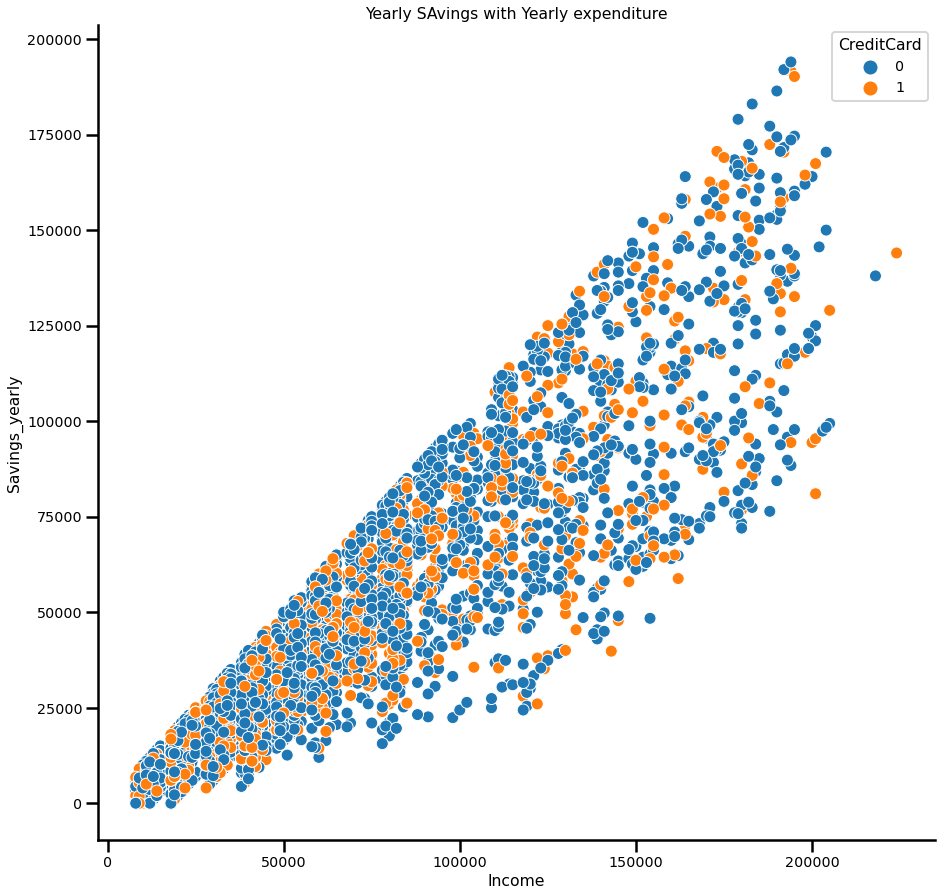

In [110]:
plt.figure(figsize=(15,15))
sns.scatterplot(df["Income"], df["Savings_yearly"], hue=df["CreditCard"])
sns.despine()
plt.title("Yearly SAvings with Yearly expenditure") 
plt.show()
# THis plot shows that with increse in income the savings was also increased. Alongside that we can also visualize that wheather
# the people who saved used credit card for expenditure or not

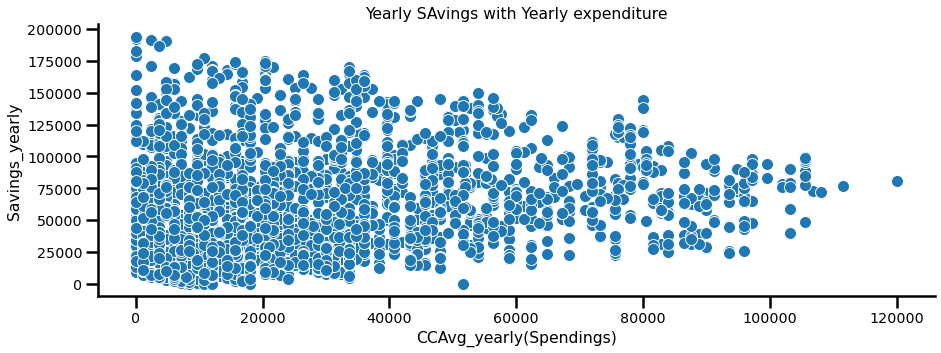

In [111]:
plt.figure(figsize=(15,5))
sns.scatterplot(df["CCAvg_yearly"], df["Savings_yearly"])
sns.despine()
plt.title("Yearly SAvings with Yearly expenditure") # Savings also incresed with respect to income
plt.xlabel("CCAvg_yearly(Spendings)")
plt.show()

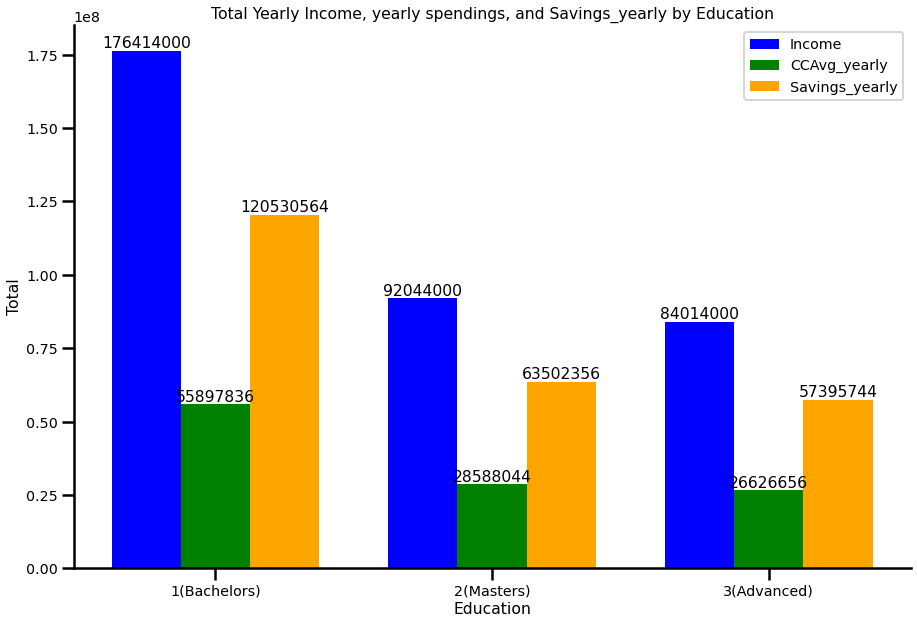

In [112]:
dff = df.groupby("Education").sum()[["Income", "CCAvg_yearly", "Savings_yearly"]].sort_values(by="Income", ascending=False)
plt.figure(figsize=(15, 10))
bar_width = 0.25

bar1 = range(len(dff))
bar2 = [x + bar_width for x in bar1]
bar3 = [x + bar_width for x in bar2]

plt.bar(bar1, dff["Income"], color='blue', width=bar_width, label='Income')
plt.bar(bar2, dff["CCAvg_yearly"], color='green', width=bar_width, label='CCAvg_yearly')
plt.bar(bar3, dff["Savings_yearly"], color='orange', width=bar_width, label='Savings_yearly')

plt.xlabel("Education")
plt.ylabel("Total")
plt.title("Total Yearly Income, yearly spendings, and Savings_yearly by Education")

# Changing the category name with respect to data dictionary
plt.xticks([r + bar_width for r in range(len(dff))], ['1(Bachelors)', '2(Masters)', '3(Advanced)'])

for i, val in enumerate(dff["Income"]):
    plt.text(i, val, str(int(val)), ha='center', va='bottom')

for i, val in enumerate(dff["CCAvg_yearly"]):
    plt.text(i + bar_width, val, str(int(val)), ha='center', va='bottom')

for i, val in enumerate(dff["Savings_yearly"]):
    plt.text(i + 2 * bar_width, val, str(int(val)), ha='center', va='bottom')

plt.legend()
sns.despine()
plt.show()


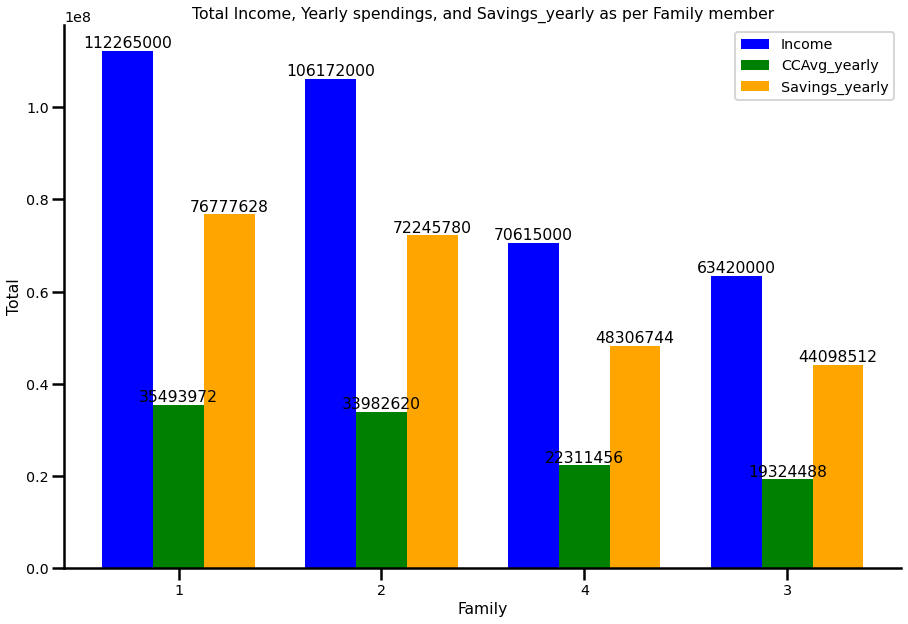

In [113]:
dff = df.groupby("Family").sum()[["Income", "CCAvg_yearly", "Savings_yearly"]].sort_values(by="Income", ascending=False)
plt.figure(figsize=(15, 10))


bar_width = 0.25
bar1 = range(len(dff))
bar2 = [x + bar_width for x in bar1]
bar3 = [x + 2 * bar_width for x in bar1]


plt.bar(bar1, dff["Income"], color='blue', width=bar_width, label='Income')
plt.bar(bar2, dff["CCAvg_yearly"], color='green', width=bar_width, label='CCAvg_yearly')
plt.bar(bar3, dff["Savings_yearly"], color='orange', width=bar_width, label='Savings_yearly')


plt.xlabel("Family")
plt.ylabel("Total")
plt.title("Total Income, Yearly spendings, and Savings_yearly as per Family member")
plt.xticks([r + bar_width for r in range(len(dff))], dff.index)


for i, val in enumerate(dff["Income"]):
    plt.text(i, val, str(int(val)), ha='center', va='bottom')

for i, val in enumerate(dff["CCAvg_yearly"]):
    plt.text(i + bar_width, val, str(int(val)), ha='center', va='bottom')

for i, val in enumerate(dff["Savings_yearly"]):
    plt.text(i + 2 * bar_width, val, str(int(val)), ha='center', va='bottom')

plt.legend()
sns.despine()
plt.show()


In [114]:
df.head()

,Age,Experience,Income,Income_monthly,Income_person_year,Family,CCAvg,CCAvg_yearly,Spending_person_year,Savings_monthly,Savings_yearly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49000,4083.333333,12250.000000,4,1600,19200,4800.0,2483.333333,29800,1,0,1,0,0,0,0
1,45,19,34000,2833.333333,11333.333333,3,1500,18000,6000.0,1333.333333,16000,1,0,1,0,0,0,0
2,39,15,11000,916.666667,11000.000000,1,1000,12000,12000.0,0.000000,0,1,0,0,0,0,0,0
3,35,9,100000,8333.333333,100000.000000,1,2700,32400,32400.0,5633.333333,67600,2,0,0,0,0,0,0
4,35,8,45000,3750.000000,11250.000000,4,1000,12000,3000.0,2750.000000,33000,2,0,0,0,0,1,0


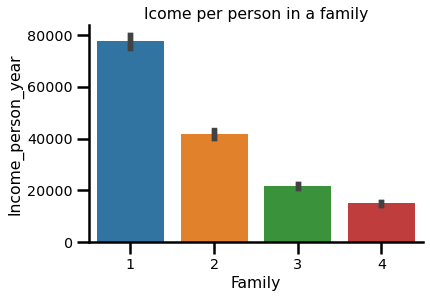

In [115]:
sns.barplot(df["Family"], df["Income_person_year"])
sns.barplot(df["Family"], df["Income_person_year"])
plt.show
plt.title("Icome per person in a family")
sns.despine()

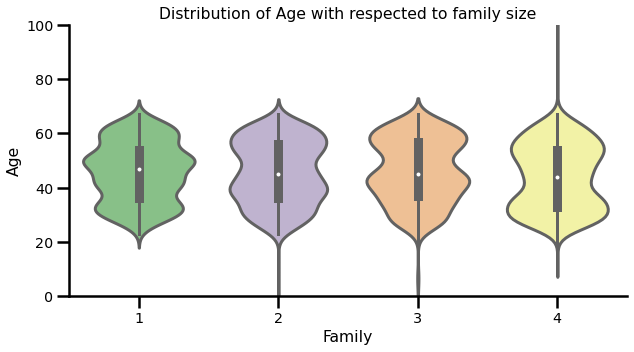

In [116]:
plt.figure(figsize=(10,5))
sns.violinplot(df["Family"], df["Age"], palette="Accent")
plt.ylim(0,100)
sns.despine()
plt.title("Distribution of Age with respected to family size")
plt.show()

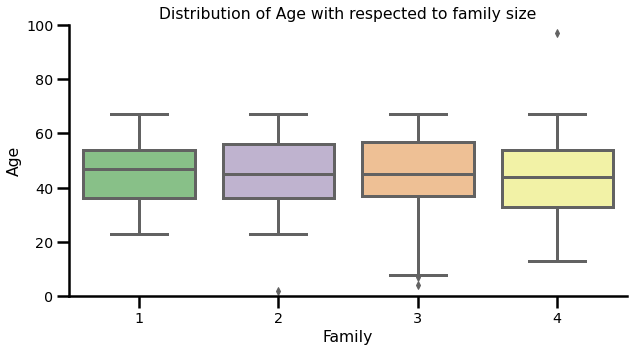

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Family"], df["Age"], palette="Accent")
plt.ylim(0,100)
sns.despine()
plt.title("Distribution of Age with respected to family size")
plt.show()

### The pdf of AGe is the same with or without the bins

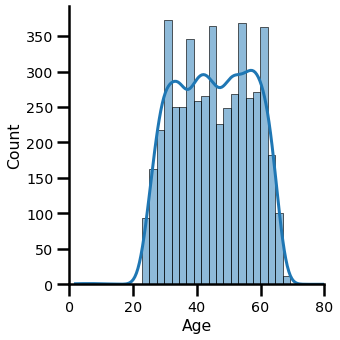

In [118]:
sns.displot(df["Age"], kde=True)
plt.xlim(0,80)
plt.show()

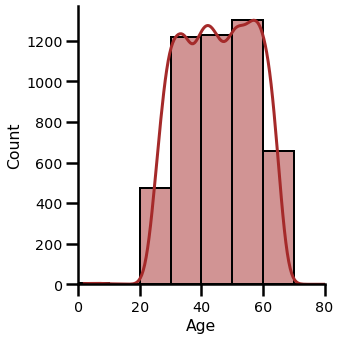

In [119]:
sns.displot(df["Age"], bins=[0,10,20,30,40,50,60,70,80,90], kde=True, color="brown")
plt.xlim(0,80)
plt.show()

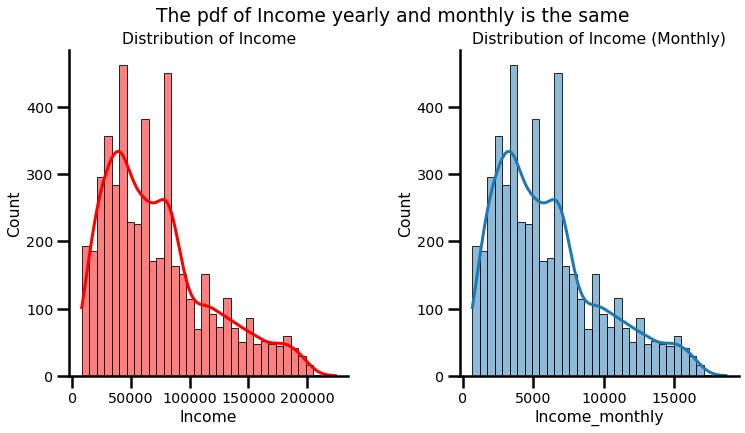

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of income yearly
sns.histplot(df["Income"], kde=True, ax=axes[0], color="red")
axes[0].set_title("Distribution of Income")

# Distribution of income monthly
sns.histplot(df["Income_monthly"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Income (Monthly)")


plt.subplots_adjust(wspace=0.4)
sns.despine()
plt.suptitle("The pdf of Income yearly and monthly is the same")
plt.show()


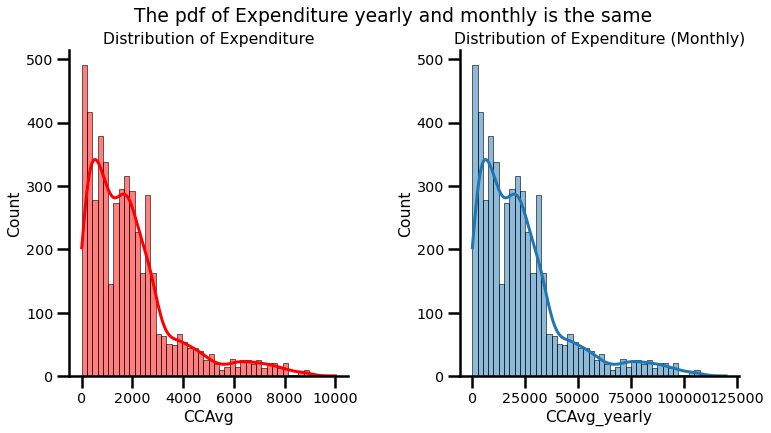

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of income yearly
sns.histplot(df["CCAvg"], kde=True, ax=axes[0], color="red")
axes[0].set_title("Distribution of Expenditure")

# Distribution of income monthly
sns.histplot(df["CCAvg_yearly"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Expenditure (Monthly)")


plt.subplots_adjust(wspace=0.4)
sns.despine()
plt.suptitle("The pdf of Expenditure yearly and monthly is the same")
plt.show()

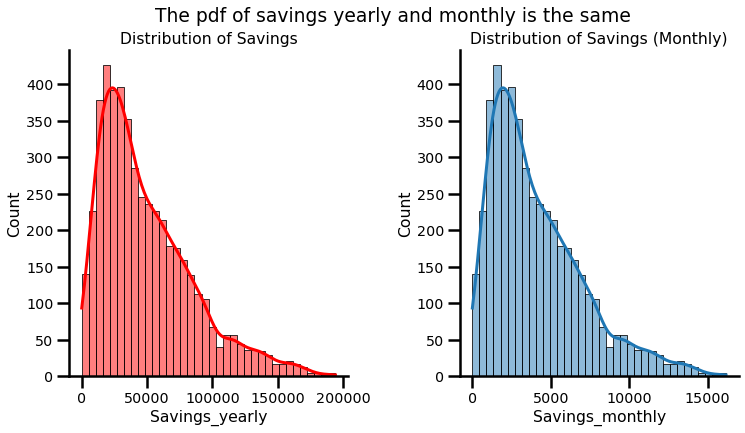

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of income yearly
sns.histplot(df["Savings_yearly"], kde=True, ax=axes[0], color="red")
axes[0].set_title("Distribution of Savings")

# Distribution of income monthly
sns.histplot(df["Savings_monthly"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Savings (Monthly)")


plt.subplots_adjust(wspace=0.4)
sns.despine()
plt.suptitle("The pdf of savings yearly and monthly is the same")
plt.show()

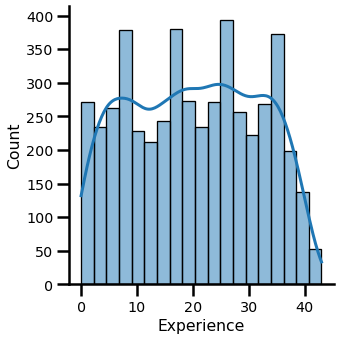

In [123]:
sns.displot(df["Experience"], kde=True)
plt.show()

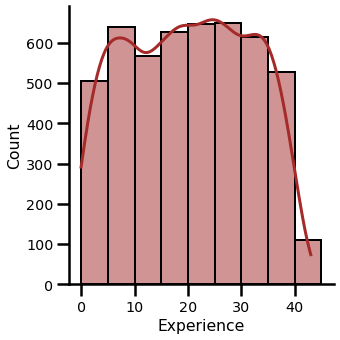

In [124]:
sns.displot(df["Experience"], bins=[0,5,10,15,20,25,30,35,40,45], kde=True, color="brown")
plt.show()

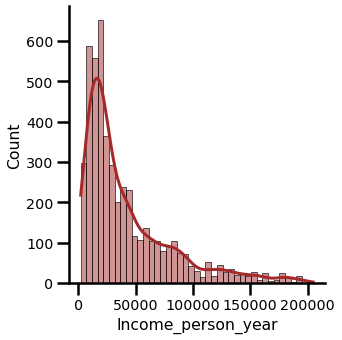

In [125]:
sns.displot(df["Income_person_year"], kde=True, color="brown") #very much skewed
plt.show()

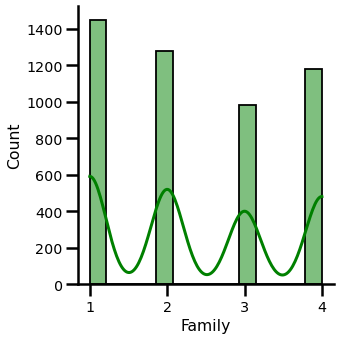

In [126]:
sns.displot(df["Family"], kde=True, color="green") #very much skewed
plt.show()

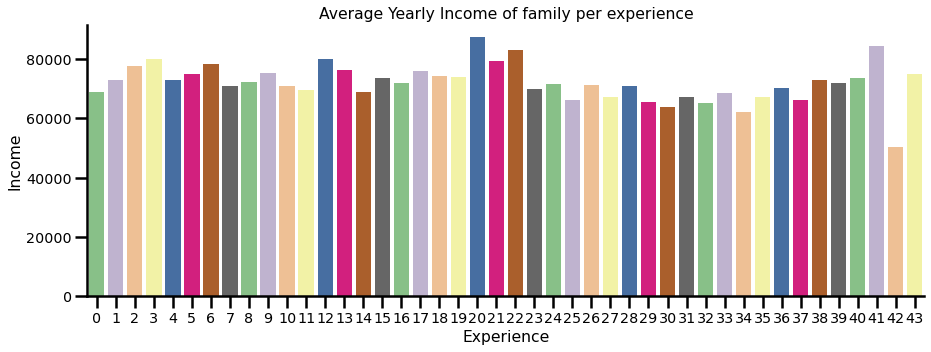

In [127]:
plt.figure(figsize=(15,5))
sns.barplot(df["Experience"], df["Income"], palette="Accent", ci=None)
sns.despine()
plt.title("Average Yearly Income of family per experience")
plt.show()

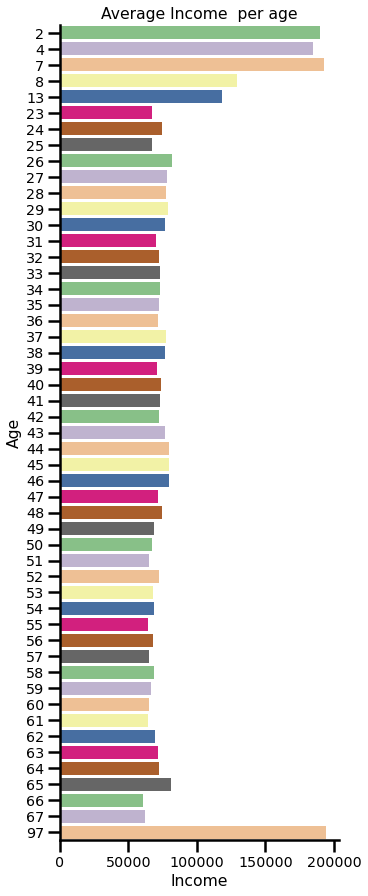

In [128]:
plt.figure(figsize=(5,15))
sns.barplot(df["Income"], df["Age"], palette="Accent", ci=None, orient="h")
sns.despine()
plt.title("Average Income  per age")
plt.show()

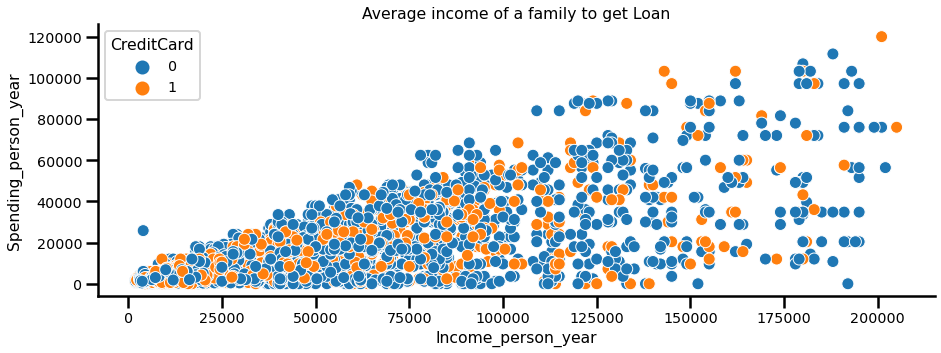

In [129]:
plt.figure(figsize=(15,5))
sns.scatterplot(df["Income_person_year"], df["Spending_person_year"], hue=df["CreditCard"])
plt.title("Average income of a family to get Loan")

sns.despine()
plt.show()
# This graph also shows the how an indivusaul spends according to their earnings with or without credit card

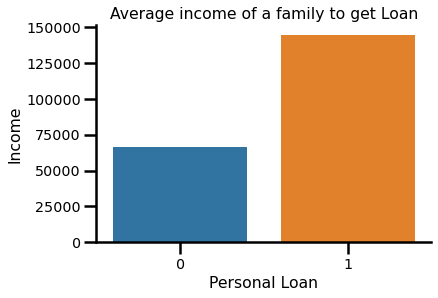

In [130]:
sns.barplot(df["Personal Loan"], df["Income"], ci=None)
plt.title("Average income of a family to get Loan")

sns.despine()
plt.show()

## PDF of numericl columns


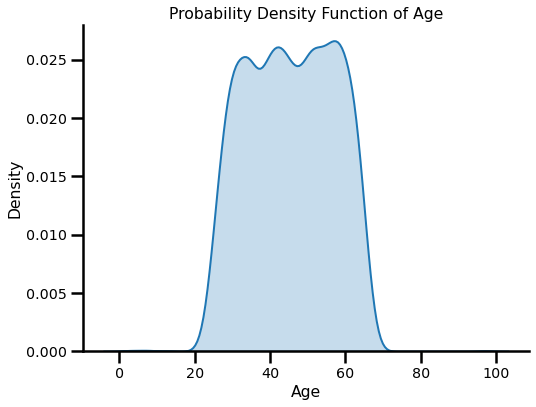

In [131]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Age"], shade=True)
sns.despine()
plt.title("Probability Density Function of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

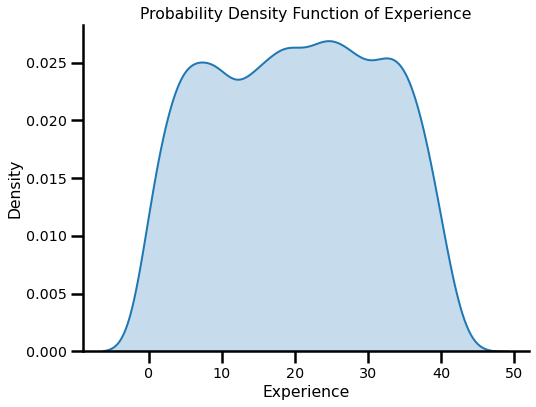

In [132]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Experience"], shade=True)
sns.despine()
plt.title("Probability Density Function of Experience")
plt.xlabel("Experience")
plt.ylabel("Density")
plt.show()

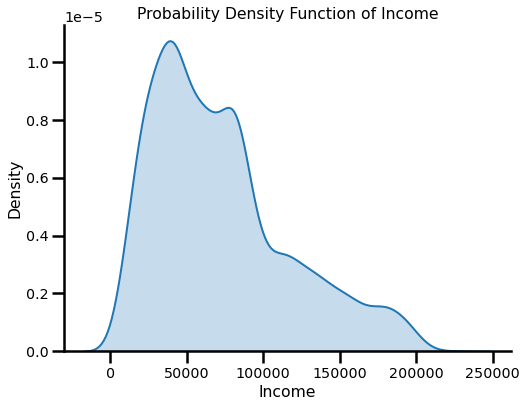

In [133]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Income"], shade=True)
sns.despine()
plt.title("Probability Density Function of Income")
plt.xlabel("Income")
plt.ylabel("Density")
plt.show()

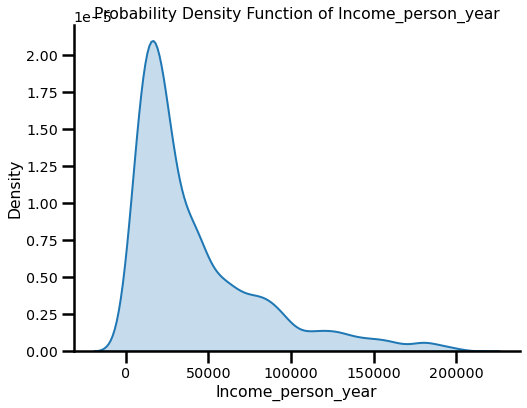

In [134]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Income_person_year"], shade=True)
sns.despine()
plt.title("Probability Density Function of Income_person_year")
plt.xlabel("Income_person_year")
plt.ylabel("Density")
plt.show()

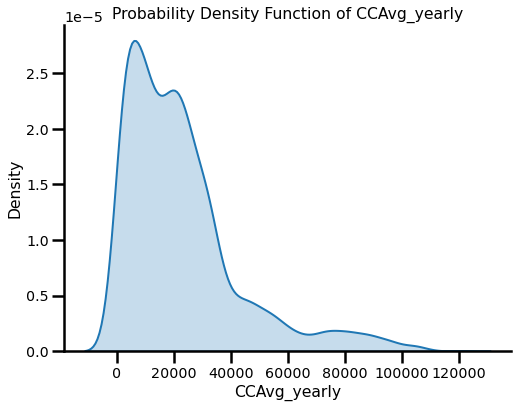

In [135]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["CCAvg_yearly"], shade=True)
sns.despine()
plt.title("Probability Density Function of CCAvg_yearly")
plt.xlabel("CCAvg_yearly")
plt.ylabel("Density")
plt.show()

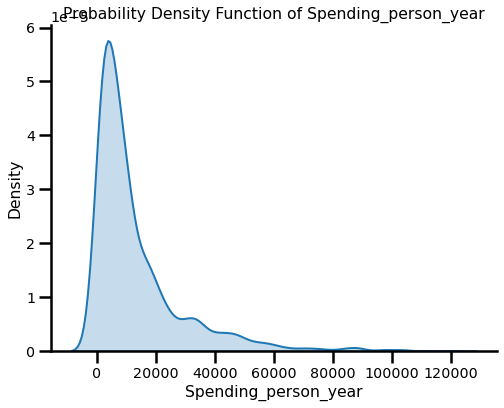

In [136]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Spending_person_year"], shade=True)
sns.despine()
plt.title("Probability Density Function of Spending_person_year")
plt.xlabel("Spending_person_year")
plt.ylabel("Density")
plt.show()

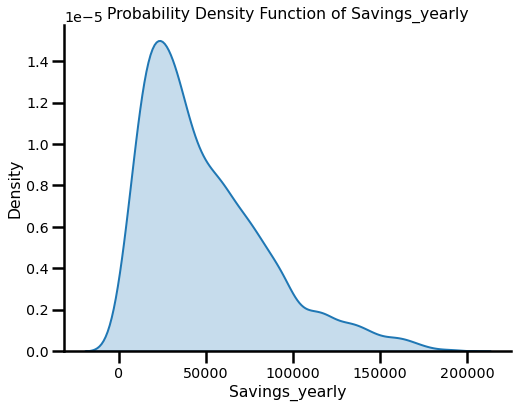

In [137]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Savings_yearly"], shade=True)
sns.despine()
plt.title("Probability Density Function of Savings_yearly")
plt.xlabel("Savings_yearly")
plt.ylabel("Density")
plt.show()

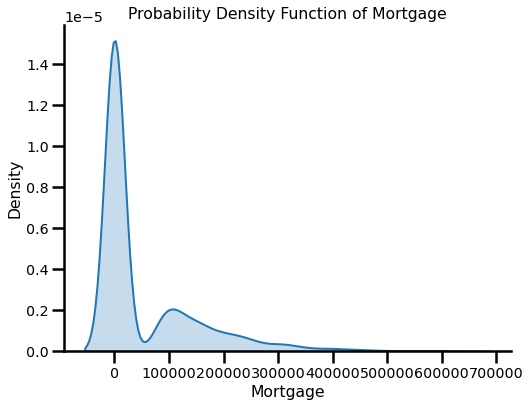

In [138]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Mortgage"], shade=True)
sns.despine()
plt.title("Probability Density Function of Mortgage")
plt.xlabel("Mortgage")
plt.ylabel("Density")
plt.show()

<hr>
<hr>

## Converting all the forged colums to integer

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4893
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4888 non-null   int64  
 1   Experience            4888 non-null   int64  
 2   Income                4888 non-null   int32  
 3   Income_monthly        4888 non-null   float64
 4   Income_person_year    4888 non-null   float64
 5   Family                4888 non-null   int64  
 6   CCAvg                 4888 non-null   int32  
 7   CCAvg_yearly          4888 non-null   int32  
 8   Spending_person_year  4888 non-null   float64
 9   Savings_monthly       4888 non-null   float64
 10  Savings_yearly        4888 non-null   int32  
 11  Education             4888 non-null   int64  
 12  Mortgage              4888 non-null   int64  
 13  Securities Account    4888 non-null   int64  
 14  CD Account            4888 non-null   int64  
 15  Online               

In [140]:
df["Income_monthly"] = df["Income_monthly"].astype(int)
df["Income_person_year"] = df["Income_person_year"].astype(int)
df["Spending_person_year"] = df["Spending_person_year"].astype(int)
df["Savings_monthly"] = df["Savings_monthly"].astype(int)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4893
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   4888 non-null   int64
 1   Experience            4888 non-null   int64
 2   Income                4888 non-null   int32
 3   Income_monthly        4888 non-null   int32
 4   Income_person_year    4888 non-null   int32
 5   Family                4888 non-null   int64
 6   CCAvg                 4888 non-null   int32
 7   CCAvg_yearly          4888 non-null   int32
 8   Spending_person_year  4888 non-null   int32
 9   Savings_monthly       4888 non-null   int32
 10  Savings_yearly        4888 non-null   int32
 11  Education             4888 non-null   int64
 12  Mortgage              4888 non-null   int64
 13  Securities Account    4888 non-null   int64
 14  CD Account            4888 non-null   int64
 15  Online                4888 non-null   int32
 16  Credit

# Modelling

## train_test_split

In [142]:
X = df.drop(columns="Personal Loan")
y = df["Personal Loan"]

In [143]:
X.head()

,Age,Experience,Income,Income_monthly,Income_person_year,Family,CCAvg,CCAvg_yearly,Spending_person_year,Savings_monthly,Savings_yearly,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,4083,12250,4,1600,19200,4800,2483,29800,1,0,1,0,0,0
1,45,19,34000,2833,11333,3,1500,18000,6000,1333,16000,1,0,1,0,0,0
2,39,15,11000,916,11000,1,1000,12000,12000,0,0,1,0,0,0,0,0
3,35,9,100000,8333,100000,1,2700,32400,32400,5633,67600,2,0,0,0,0,0
4,35,8,45000,3750,11250,4,1000,12000,3000,2750,33000,2,0,0,0,0,1


In [145]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int32

## Finding a random state where my models accuracy is the best

In [146]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [147]:
np.argmax(scores)

738

In [148]:
print("Size of X_train", X_train.shape)
print("Size of X_test", X_test.shape)
print("Size of y_train", y_train.shape)
print("Size of y_test", y_test.shape)

Size of X_train (4399, 17)
Size of X_test (489, 17)
Size of y_train (4399,)
Size of y_test (489,)


### The random_state at which the models accuracy was high was 738 lets check how much was the accuray

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=738)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test) # Predicting outcome for testing data
accuracy = accuracy_score(y_test,y_pred)*100
print(f"The accuracy of testing data for Logistic Regression is {accuracy:.2f}%")

# Cross-validation score
cv_scores = cross_val_score(lr, X, y, cv=5)  # Perform 5-fold cross-validation
mean_cv_score = cv_scores.mean()

# Precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The cross-validation score is {mean_cv_score:.2f}")
print(f"The precision is {precision:.2f}")
print(f"The recall is {recall:.2f}")
print(f"The F1 score is {f1:.2f}")

The accuracy of testing data for Logistic Regression is 93.05%
The cross-validation score is 0.92
The precision is 0.52
The recall is 0.25
The F1 score is 0.33


In [150]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)  # Predicting outcome for testing data
train_accuracy = accuracy_score(y_train, y_train_pred)*100  # Calculate accuracy on the training set
print(f"The accuracy of training data for Logistic Regression is {train_accuracy:.2f}%")


The accuracy of training data for Logistic Regression is 91.79%


### The accuracy of training and testing data is some how similar 93% and 91% which can be concluded my model here is not overfitting 

## Chekcing accuracy for test data in other random state

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9212678936605317

In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.918200408997955

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9314928425357873

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9314928425357873

# Random Forest Classifier

In [155]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=738)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) # Predicting outcome for testing data
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"The accuracy of testing data for Random Forest Classifier is {accuracy:.2f}%")

cv_scores = cross_val_score(lr, X, y, cv=5)  # Perform 5-fold cross-validation
mean_cv_score = cv_scores.mean()

# Precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The cross-validation score is {mean_cv_score:.2f}")
print(f"The precision is {precision:.2f}")
print(f"The recall is {recall:.2f}")
print(f"The F1 score is {f1:.2f}")

The accuracy of testing data for Random Forest Classifier is 99.08%
The cross-validation score is 0.92
The precision is 0.98
The recall is 0.88
The F1 score is 0.93


In [156]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)  # Predicting outcome for training data
train_accuracy = accuracy_score(y_train, y_train_pred)*100  # Calculate accuracy on the training set
print(f"The accuracy of training data for Random Forest Classifier is {accuracy:.2f}%")

The accuracy of training data for Random Forest Classifier is 99.08%


# Support Vector Machine (SVM) Classifier:

In [157]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=738)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"The accuracy of testing data for SVM Classifier is {accuracy:.2f}%")

cv_scores = cross_val_score(lr, X, y, cv=5)  # Perform 5-fold cross-validation
mean_cv_score = cv_scores.mean()

# Precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The cross-validation score is {mean_cv_score:.2f}")
print(f"The precision is {precision:.2f}")
print(f"The recall is {recall:.2f}")
print(f"The F1 score is {f1:.2f}")

The accuracy of testing data for SVM Classifier is 94.58%
The cross-validation score is 0.92
The precision is 0.90
The recall is 0.26
The F1 score is 0.40


In [158]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
svm = SVC()
svm.fit(X_train, y_train)
y_train_pred = svm.predict(X_train)  # Predicting outcome for training data
train_accuracy = accuracy_score(y_train, y_train_pred)*100  # Calculate accuracy on the training set
print(f"The accuracy of training data for SVM Classifier is {accuracy:.2f}%")

The accuracy of training data for SVM Classifier is 94.58%


# K-Nearest Neighbors (KNN) Classifier:

In [159]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=738)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"The accuracy of testing data for KNN Classifier is {accuracy:.2f}%")

cv_scores = cross_val_score(lr, X, y, cv=5)  # Perform 5-fold cross-validation
mean_cv_score = cv_scores.mean()

# Precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The cross-validation score is {mean_cv_score:.2f}")
print(f"The precision is {precision:.2f}")
print(f"The recall is {recall:.2f}")
print(f"The F1 score is {f1:.2f}")

The accuracy of testing data for KNN Classifier is 94.79%
The cross-validation score is 0.92
The precision is 0.71
The recall is 0.43
The F1 score is 0.54


In [160]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)  # Predicting outcome for training data
train_accuracy = accuracy_score(y_train, y_train_pred)*100  # Calculate accuracy on the training set
print(f"The accuracy of training data for KNN Classifier is {accuracy:.2f}%")

The accuracy of training data for KNN Classifier is 94.79%


In [161]:
df["Personal Loan"].value_counts()

0    4520
1     368
Name: Personal Loan, dtype: int64

# Using SMOTE since the class is imbalanced
## Logistic Regression

In [162]:
from imblearn.over_sampling import SMOTE

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=738)

In [164]:
smote = SMOTE(random_state=738)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [165]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [166]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The accuracy of testing data with SMOTE is {accuracy:.2f}%")
print(f"The precision is {precision:.2f}")
print(f"The recall is {recall:.2f}") # There is high cange in recall after using smote
print(f"The F1 score is {f1:.2f}")


The accuracy of testing data with SMOTE is 78.02%
The precision is 0.23
The recall is 0.87
The F1 score is 0.36


# Using SMOTE since the class is imbalanced
## Random forest

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=738)

In [168]:
smote = SMOTE(random_state=738)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [169]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [170]:
y_pred = rf_smote.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"The accuracy of testing data with SMOTE for random forest is {accuracy:.2f}%")
print(f"The precision is {precision:.2f}")
print(f"The recall is {recall:.2f}")
print(f"The F1 score is {f1:.2f}")

The accuracy of testing data with SMOTE for random forest is 98.57%
The precision is 0.88
The recall is 0.93
The F1 score is 0.90


# Predicting with new data

In [171]:
def new_data(Age, Experience, Income, Income_monthly, Income_person_year, Family, CCAvg, CCAvg_yearly, Spending_person_year,
            Savings_monthly, Savings_yearly, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard):
    input_data = (Age, Experience, Income, Income_monthly, Income_person_year, Family, CCAvg, CCAvg_yearly, Spending_person_year,
                  Savings_monthly, Savings_yearly, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard)

    input_data = np.asarray(input_data)

    # reshaping the np array as we are predicitng for one instance
    input_data_reshaped = input_data.reshape(1,-1)


    prediction = rf_smote.predict(input_data_reshaped) # Using the random forest model with smote
    return(prediction)

In [172]:
prediction = new_data(34,9,180000,15000,180000,1,8900,106800,106800,6100,73200,3,1,1,1,1,1)
print(prediction)
if prediction == 1:
    print("YES! Customer accpted the personal loan offered in the last campaign.")
else:
    print("NO! Customer did not accept the personal loan offered in the last campaign.")

    

[1]
YES! Customer accpted the personal loan offered in the last campaign.


In [173]:
prediction = new_data(25,10,270000,52000,270000,2,6500,106800,39600,9800,69300,3,0,0,0,0,1)
print(prediction)
if prediction == 1:
    print("YES! Customer accpted the personal loan offered in the last campaign.")
else:
    print("NO! Customer did not accept the personal loan offered in the last campaign.")

    

[1]
YES! Customer accpted the personal loan offered in the last campaign.


In [174]:
prediction = new_data(15,10,27000,52000,27000,1,6500,10600,39600,9800,6930,1,0,0,0,0,1)
print(prediction)
if prediction == 1:
    print("YES! Customer accpted the personal loan offered in the last campaign.")
else:
    print("NO! Customer did not accept the personal loan offered in the last campaign.")

    

[0]
NO! Customer did not accept the personal loan offered in the last campaign.
